## 영화 평점에 대한 평점 변화(시각화)

In [45]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [37]:
base_url='https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20170501'
try:
    html = urlopen(base_url+sub_url)
except HTTPError as he:
    print('http error')
except URLError as us:
    print('url error')
else:
    soup = BeautifulSoup(html.read(),'html.parser')

In [38]:
soup.find_all('div','tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=147092" title="히든 피겨스">히든 피겨스</a>
</div>

In [39]:
soup.find_all('div','tit5')[0].a.string

'히든 피겨스'

In [40]:
soup.find_all('div','tit5')[0].a.get_text()

'히든 피겨스'

 - 평점을 추출한다면

In [41]:
soup.find_all('td','point')[0].get_text()

'9.38'

 - dataframe을 만들기 위해서는 셀의 길이가 동일해야 하므로 확인 절차가 필요하다

In [42]:
print('영화 이름 : ',len(soup.find_all('div','tit5')))
print('영화 평점 :',len(soup.find_all('td','point')))

영화 이름 :  50
영화 평점 : 50


In [43]:
move_names = [soup.find_all('div','tit5')[n].a.get_text() for n in range(0,50)]
print(len(move_names))
print(move_names)

50
['히든 피겨스', '사운드 오브 뮤직', '시네마 천국', '미스 슬로운', '잉여들의 히치하이킹', '나, 다니엘 블레이크', '바람과 함께 사라지다', '오즈의 마법사', '벤허', '흑집사 : 북 오브 더 아틀란틱', '우리들', '일 포스티노', '댄서', '라이언', '코알라', '로건', '더 플랜', '분노의 질주: 더 익스트림', '시카고', '10분', '해리가 샐리를 만났을 때', '미녀와 야수', '너의 이름은.', '그랑블루', '한공주', '연애담', '포켓몬 더 무비 XY&Z; 「볼케니온 : 기계왕국의 비밀」', '리틀 프린세스 소피아: 엘레나와 비밀의 아발로 왕국', '분노', '맨체스터 바이 더 씨', '행복 목욕탕', '스머프: 비밀의 숲', '부당거래', '파닥파닥', '아비정전', '패션 오브 크라이스트', '라라랜드', '뽀로로 극장판 슈퍼썰매 대모험', '족구왕', '가디언즈 오브 갤럭시', '자전거 탄 소년', '오두막', '성실한 나라의 앨리스', '원라인', '존 윅 - 리로드', '사일런스', '클로저', '임금님의 사건수첩', '문라이트', '로미오와 줄리엣']


In [44]:
move_points = [soup.find_all('td','point')[n].get_text() for n in range(0,50)]
print(len(move_points))
print(move_points)

50
['9.38', '9.36', '9.29', '9.26', '9.25', '9.25', '9.24', '9.23', '9.22', '9.20', '9.18', '9.17', '9.14', '9.07', '9.07', '9.06', '9.04', '9.02', '8.92', '8.89', '8.89', '8.85', '8.81', '8.78', '8.78', '8.76', '8.75', '8.73', '8.73', '8.72', '8.70', '8.67', '8.66', '8.65', '8.59', '8.59', '8.59', '8.56', '8.56', '8.56', '8.54', '8.48', '8.39', '8.29', '8.28', '8.26', '8.20', '8.17', '8.12', '8.10']


In [48]:
date = pd.date_range('2017-5-1',periods=100,freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [49]:
import urllib
from tqdm import tqdm_notebook # loop 에 대한 진행 상태에 대해 보여준다. 
import time 

In [51]:
for n in tqdm_notebook(range(100)):
    time.sleep(0.1)

In [56]:
for x in tqdm_notebook(range(5),desc='outer'):
    for y in tqdm_notebook(range(20),desc='innter'):
        time.sleep(0.1)

In [75]:
names_result=[]
points_result=[]
date_result=[]

In [76]:
base_url='https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date='
for day in tqdm_notebook(date):
#     print(day)
    html = base_url+sub_url+ '{date}' # 가변 변수
    response = urlopen(html.format(date=urllib.parse.quote(day.strftime('%Y%m%d')))) # 여기서 오픈한다. 가변변수값은 이렇게 넣어준다.
    soup = BeautifulSoup(response,'html.parser')
    end = len(soup.find_all('td','point'))
    names_result.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)]) # 리스트에 요소를 넣어주는 함수
    points_result.extend([soup.find_all('td','point')[n].string for n in range(0,end)])
    date_result.extend([day for n in range(0,end)])


In [77]:
print(len(names_result))
print(len(points_result))
print(len(date_result))

4723
4723
4723


In [78]:
movieDF = pd.DataFrame({'date':date_result, 'name':names_result, 'point': points_result})

In [80]:
movieDF.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [81]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


 - astype 타입변환

In [84]:
type(movieDF['point'])

pandas.core.series.Series

In [85]:
movieDF['point'] = movieDF['point'].astype(float)

In [87]:
movieDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- 내가 원하는 영화의 평점을 총점으로 확인하고 싶다면?
- 피봇테이블을 이용할 수 있습니다.

In [94]:
movie_pivot = pd.pivot_table(movieDF, index=['name'], aggfunc=np.sum) # 이런식으로 집계를 할 수 있다.
movie_pivot

,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48
7인의 사무라이,36.60
8 마일,195.36
가디언즈 오브 갤럭시,34.22
가디언즈 오브 갤럭시 VOL. 2,484.45


 - 결과에 대한 정렬이 필요 할 경우 sort_values(by= , ascending=)

In [99]:
movie_pivot_sort = movie_pivot.sort_values(by='point',ascending=False)

In [100]:
movie_pivot_sort

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


 - 컬럼에 where 조건절

In [105]:
temp = movieDF.query('name==["라라랜드"]')
temp

,date,name,point
36,2017-05-01,라라랜드,8.59
86,2017-05-02,라라랜드,8.59
143,2017-05-03,라라랜드,8.59
184,2017-05-04,라라랜드,8.59
234,2017-05-05,라라랜드,8.59
283,2017-05-06,라라랜드,8.59
333,2017-05-07,라라랜드,8.59
389,2017-05-08,라라랜드,8.59
434,2017-05-09,라라랜드,8.59
484,2017-05-10,라라랜드,8.59


 - 시각화

In [106]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

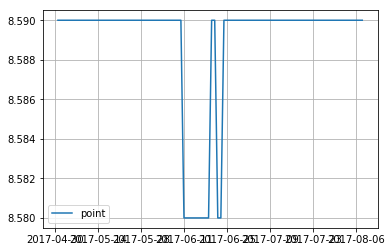

In [110]:
plt.plot(temp['date'],temp['point']) # x축 / y축
plt.legend(loc='best') # 범례
plt.grid() # 선을 보여준다.
plt.show()

- 영화별 날짜 변화에 따른 평점 변화 시각화[실습]

In [112]:
movie_date_point_pivot = pd.pivot_table(movieDF, index=['date'], columns=['name'], values=['point'])

In [114]:
movie_date_point_pivot

point                                                         \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이  8 마일   
date                                                                      
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-06  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-07  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-08  8.89   NaN      NaN          NaN         NaN      NaN   NaN   
2017-05-09  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-10  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-11  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-12  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-13  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-14  8.89   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-15   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-16   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-17   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-18   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-19   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-20   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-21   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-22   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-23   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-24   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-25   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-26   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-27   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-28   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-29   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
2017-05-30   NaN   NaN      NaN          NaN         NaN      NaN  8.88   
...          ...   ...      ...          ...         ...      ...   ...   
2017-07-10   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-11   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-12   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-13   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-14   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-15   NaN   NaN      NaN         8.58        7.84      NaN   NaN   
2017-07-16   NaN   NaN      NaN         8.58        7.85      NaN   NaN   
2017-07-17   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-18   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-19   NaN   NaN      NaN         8.58        7.83      NaN   NaN   
2017-07-20   NaN  7.48      NaN          NaN        7.84      NaN   NaN   
2017-07-21   NaN  7.34      NaN          NaN        7.84      NaN   NaN   
2017-07-22   NaN  7.79      NaN          NaN        7.84      NaN   NaN   
2017-07-23   NaN  7.58      NaN          NaN        7.84      NaN   NaN   
2017-07-24   NaN  7.55      NaN          NaN        7.84     9.15   NaN   
2017-07-25   NaN  7.53      NaN          NaN        7.84     9.15   NaN   
2017-07-26   NaN  7.48      NaN          NaN        7.84     9.15   NaN   
2017-07-27   NaN  7.49      NaN          NaN        7.85     9.15   NaN   
2017-07-28   NaN  7.46      NaN          NaN        7.85      NaN   NaN   
2017-07-29   NaN  7.45      NaN     

In [116]:
movie_date_point_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [117]:
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


In [149]:
target_col = ['행복 목욕탕']
plt.plot(movie_date_point_pivot2[target_col]) # x축 / y축
plt.legend(loc='best') # 범례
plt.grid() # 선을 보여준다.
plt.show()

C:\Users\hwang in beom\Anaconda3\lib\site-packages\pandas\core\indexes\multi.py:1784: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_codes = [level_codes[key] for level_codes in self.codes]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [145]:
movie_date_point_pivot2 = movie_date_point_pivot.columns.drop(['point'])

In [146]:
movie_date_point_pivot2

MultiIndex(levels=[['point'], [10분, 47 미터, 500일의 썸머, 7년-그들이 없는 언론, 7번째 내가 죽던 날, 7인의 사무라이, 8 마일, 가디언즈 오브 갤럭시, 가디언즈 오브 갤럭시 VOL. 2, 겟 아웃, 공각기동대 : 고스트 인 더 쉘, 군함도, 그 후, 그녀, 그랑블루, 그물, 극장판 짱구는 못말려 : 습격!! 외계인 덩덩이, 극장판 쿠로코의 농구 라스트 게임, 기쿠지로의 여름, 꿈의 제인, 나, 다니엘 블레이크, 나는 부정한다, 나의 붉은 고래, 나의 사랑, 그리스, 내 사랑, 너와 100번째 사랑, 너의 이름은., 노무현입니다, 눈길, 눈발, 다음 침공은 어디?, 다크 나이트, 다크 하우스, 대립군, 댄서, 더 록, 더 리더: 책 읽어주는 남자, 더 서클, 더 플랜, 덩케르크, 뚜르: 내 생애 최고의 49일, 라라랜드, 라붐, 라이언, 레옹, 로건, 로마 위드 러브, 로마의 휴일, 로미오와 줄리엣, 로보캅, 론 레인저, 리얼, 리틀 프린세스 소피아: 엘레나와 비밀의 아발로 왕국, 마미, 말할 수 없는 비밀, 매치 포인트, 맥베스, 맨체스터 바이 더 씨, 메밀꽃, 운수 좋은 날, 그리고 봄봄, 명탐정 코난:진홍의 연가, 모던 타임즈, 목소리의 형태, 몬스터, 문라이즈 킹덤, 문라이트, 물랑 루즈, 미녀와 야수, 미드나잇 인 파리, 미스 슬로운, 미이라, 바람과 함께 사라지다, 박열, 박쥐, 발레리나, 밤의 해변에서 혼자, 배틀로얄, 범죄의 여왕, 벤허, 벨벳 골드마인, 보스 베이비, 보안관, 복수는 나의 것, 본 슈프리머시, 본 투 비 블루, 부당거래, 분노, 분노의 질주: 더 익스트림, 불한당: 나쁜 놈들의 세상, 블랙, 블루 발렌타인, 비포 선라이즈, 비포 선셋, 뽀로로 극장판 슈퍼썰매 대모험, 사랑은 비를 타고, 사운드 오브 뮤직, 사일런스, 색, 계, 샤인, 서서평, 천천히 평온하게, 석조저택 살인사건, 성실한 나라의 앨리스, 셰임, 소셜포비아, 소중한 날의 꿈, 송 투 송, 쇠파리, 슈퍼 빼꼼: 스파이 대작전,